Notebook to plot group cross section data calculated by NT_XS

N = number of fast groups
M = number of evaluation points per group

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# N,M combinations
#NMs = {50: [20], 100: [10, 20, 40], 150: [20], 200: [5, 10, 20]}
Ns = [50,100,150]
NMs = {n: [20] for n in Ns}

data_dir = 'data/V1/'

mats = ['Norite', 'G4_Si']

filename = lambda mat, N, M: data_dir + f'data_{mat}_{N}_{M}_xs.dat'

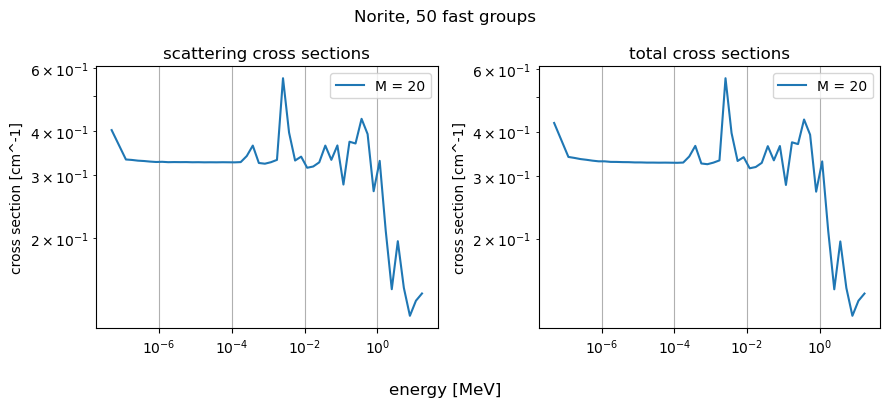

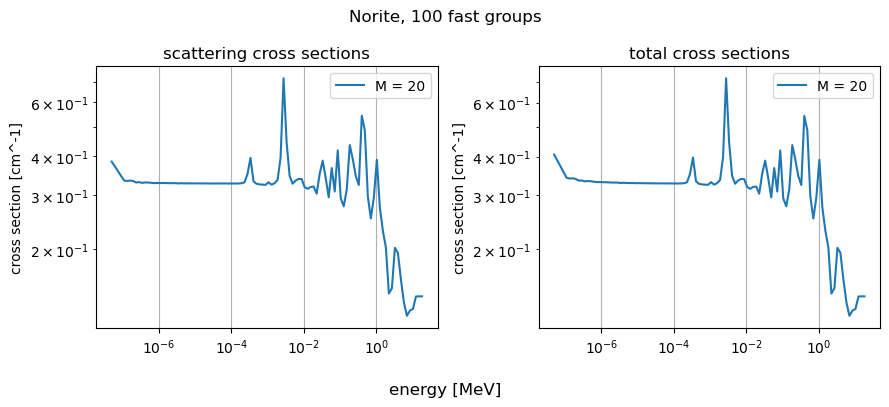

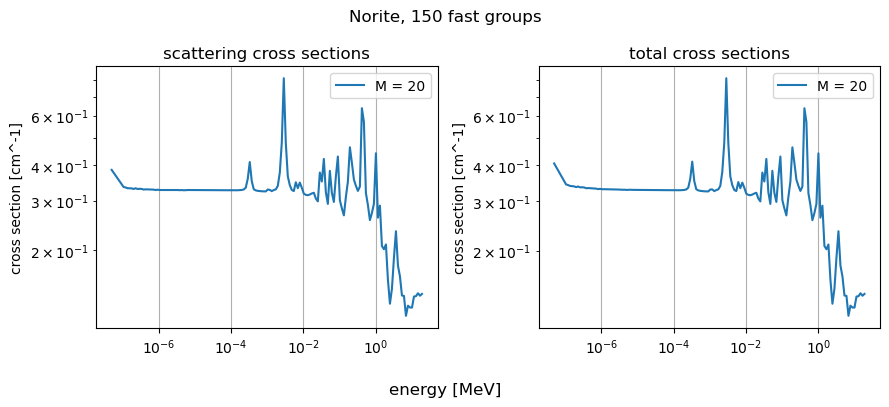

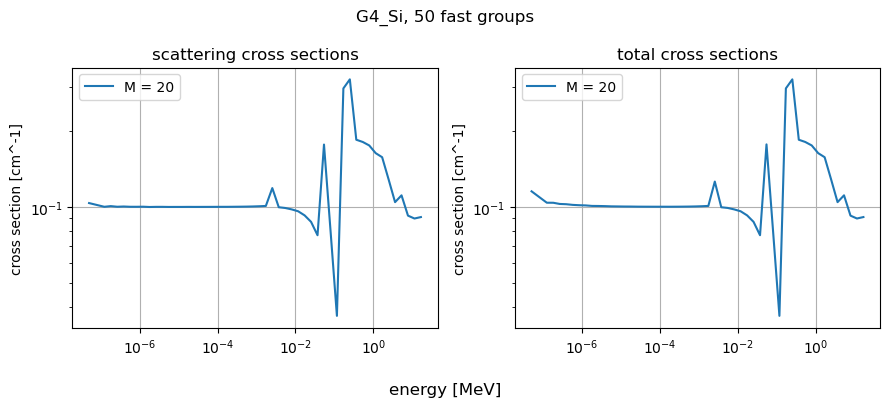

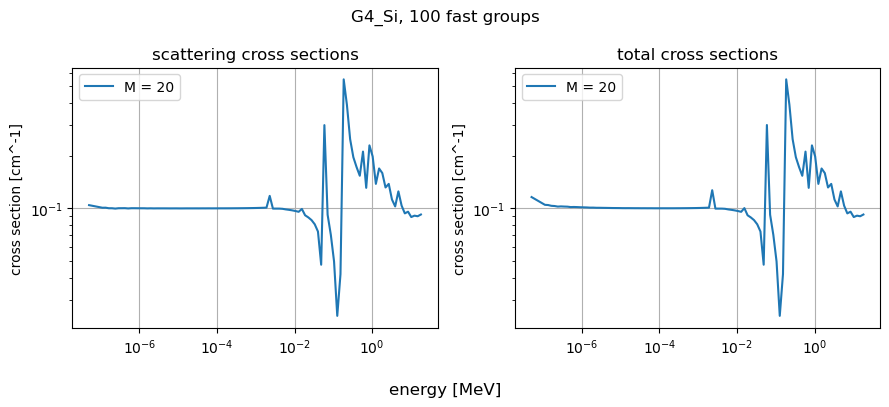

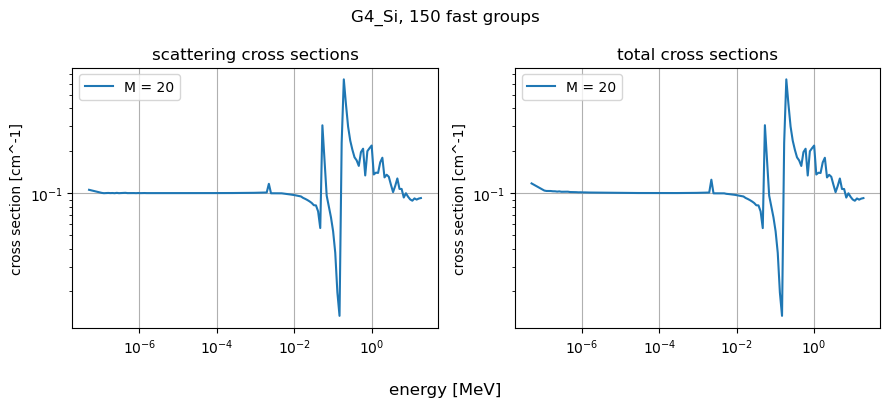

In [14]:
# plot cross sections
data = {}

for mat in mats:
    for N in NMs:
        fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = False, figsize = (9, 4))
        
        fig.suptitle(f'{mat}, {N} fast groups')
        fig.supxlabel('energy [MeV]')
        axs[0].set_title('scattering cross sections')
        axs[1].set_title('total cross sections')

        for ax in axs:
            ax.grid()
            ax.set_ylabel('cross section [cm^-1]')

        for M in NMs[N]:
            file = filename(mat, N, M)
            df = pd.read_csv(file, sep = ' ', index_col = False, names = ['g', 'Eg', 'xs', 'xt'])

            Eg = (df['Eg'].values[1:] + df['Eg'].values[:-1])/2
            xs = df['xs'].values[1:]
            xt = df['xt'].values[1:]

            data[mat,N,M] = df

            axs[0].plot(Eg, xs, label = f'M = {M}')
            axs[1].plot(Eg, xt, label = f'M = {M}')

        for ax in axs:
            ax.legend()
            #ax.semilogy()
            ax.loglog()
        fig.tight_layout()

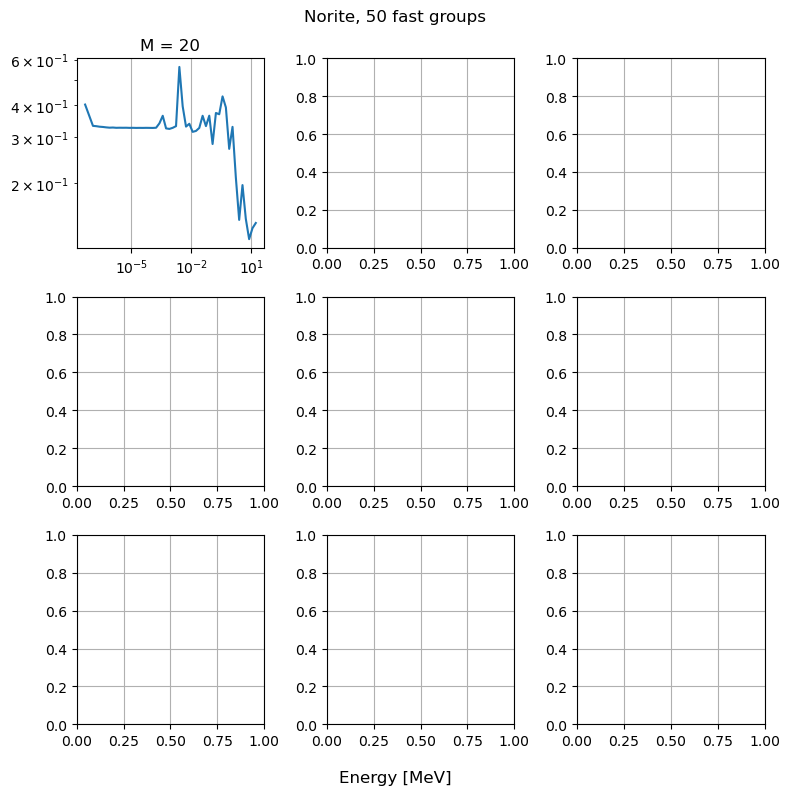

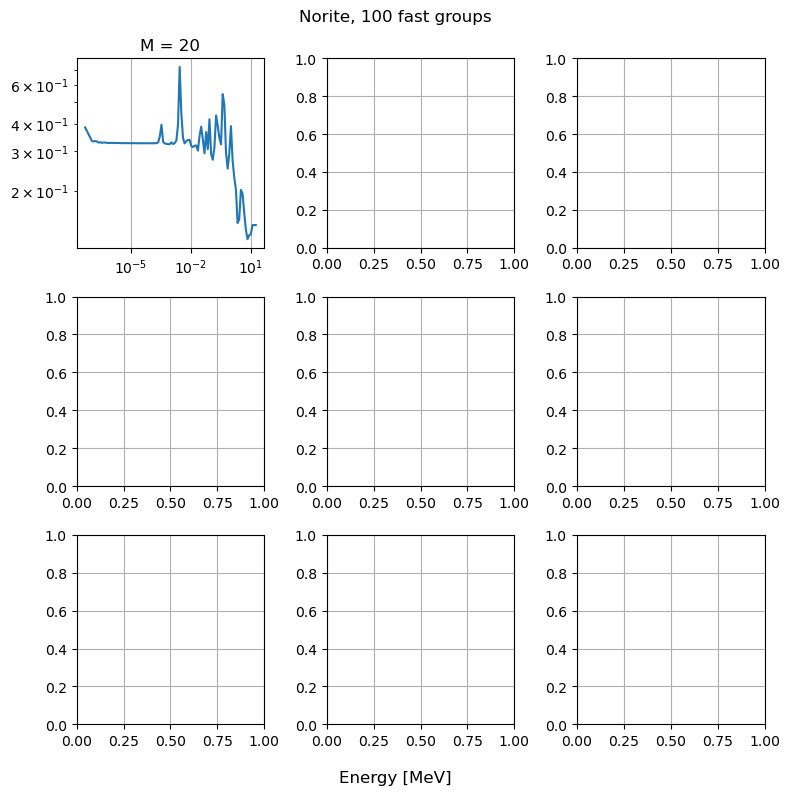

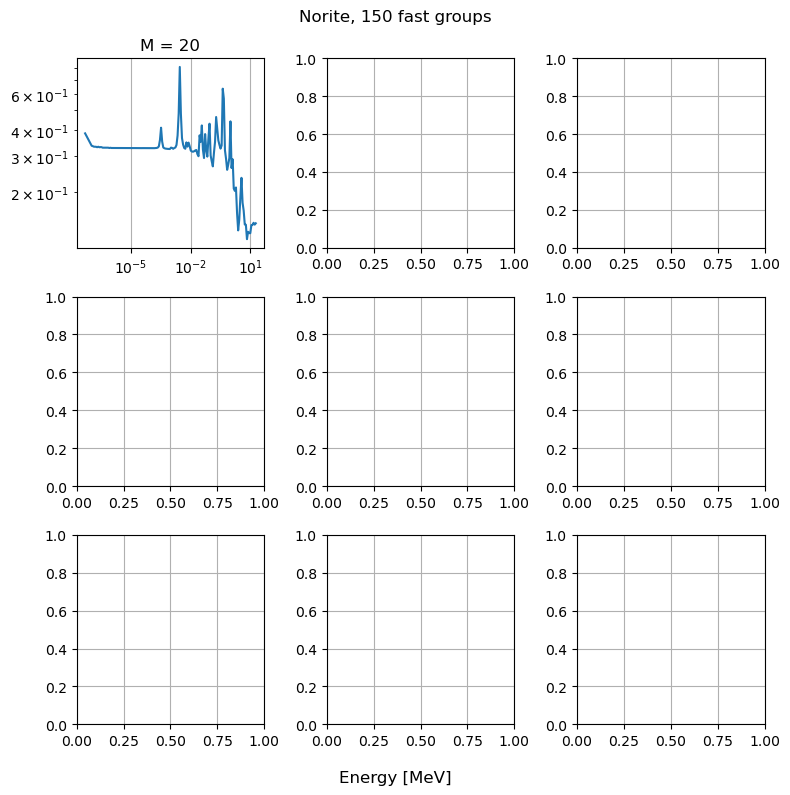

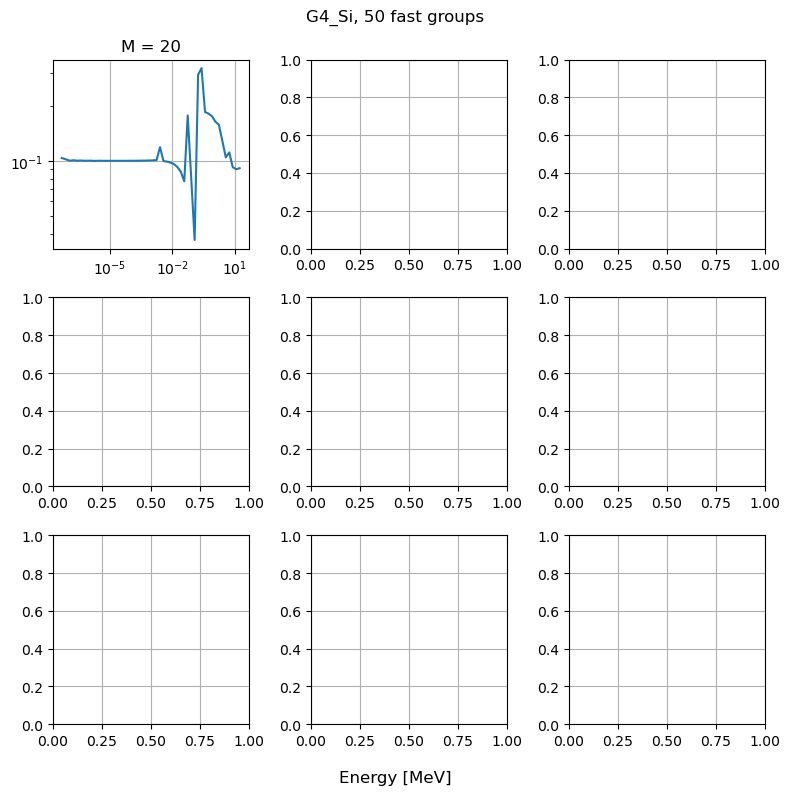

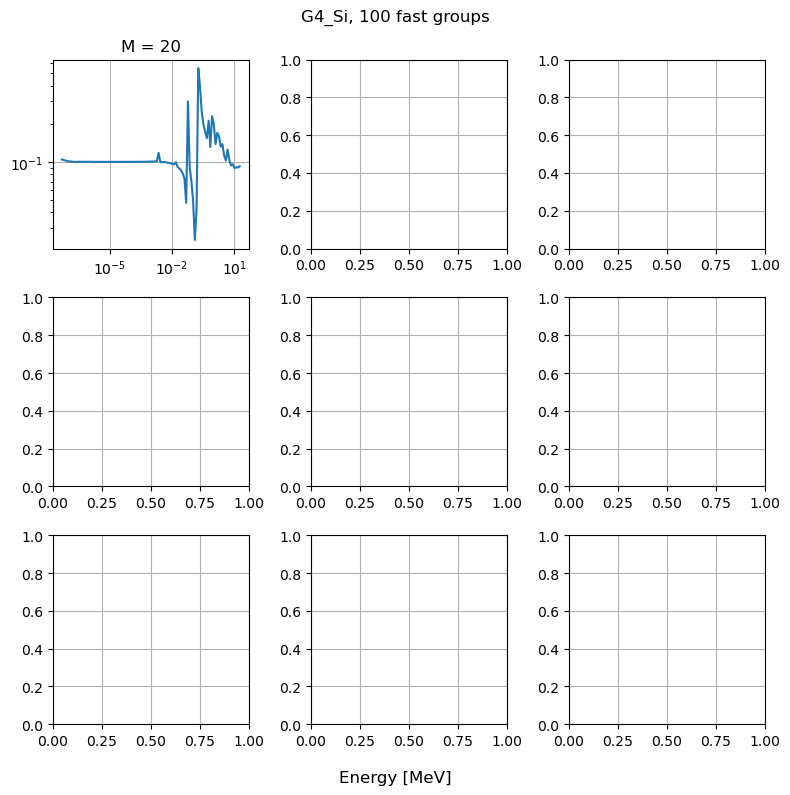

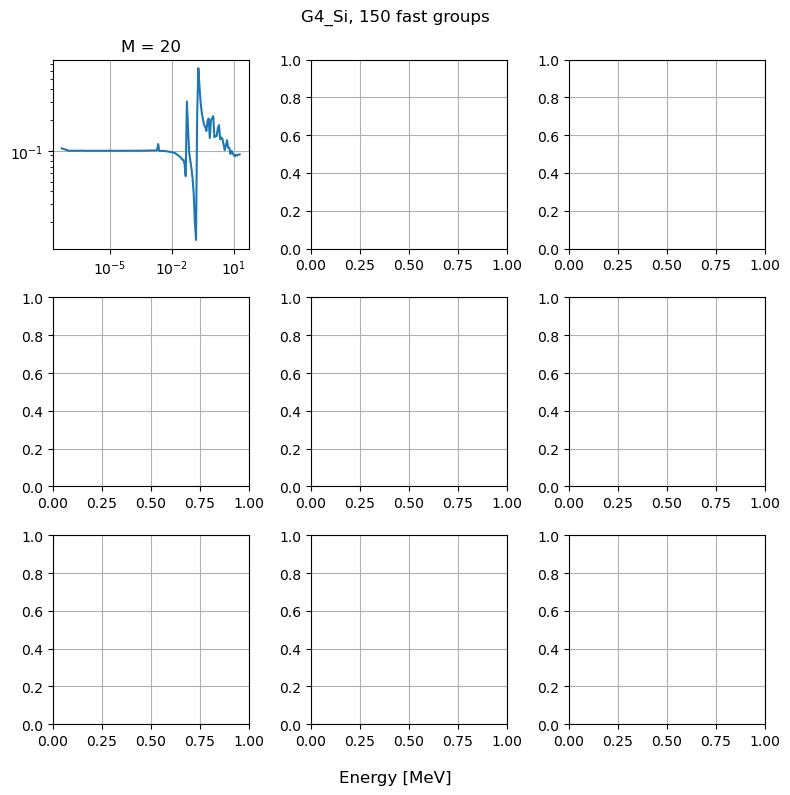

In [15]:
for mat in mats:
    for N in NMs:

        fig, axs = plt.subplots(nrows = 3, ncols = 3, sharex = False, sharey = False, figsize = (8,8))

        for ax in axs.flatten():
            ax.grid()

        fig.suptitle(f'{mat}, {N} fast groups')
        fig.supxlabel('Energy [MeV]')
        #fig.supylabel('Relative error')

        for i, M1 in enumerate(NMs[N]):
            df1 = data[mat,N,M1]
            Eg1 = (df1['Eg'].values[1:] + df1['Eg'].values[:-1])/2
            xs1 = df1['xs'].values[1:]
            xt1 = df1['xt'].values[1:]
            for j, M2 in enumerate(NMs[N]):
                if M1 == M2:
                    axs[i,j].plot(Eg1, xs1)
                    axs[i,j].set_title(f'M = {M1}')
                    axs[i,j].loglog()
                else:
                    df2 = data[mat,N,M2]
                    Eg2 = (df2['Eg'].values[1:] + df2['Eg'].values[:-1])/2
                    xs2 = df2['xs'].values[1:]
                    xt2 = df2['xt'].values[1:]
                    if all(np.isclose(Eg1,Eg2)):
                        axs[i,j].plot(Eg1, (xs1 - xs2)/xs1)
                        axs[i,j].set_title(f'({M1} - {M2} )/ {M1}')
                    
                    axs[i,j].semilogx()
        fig.tight_layout()

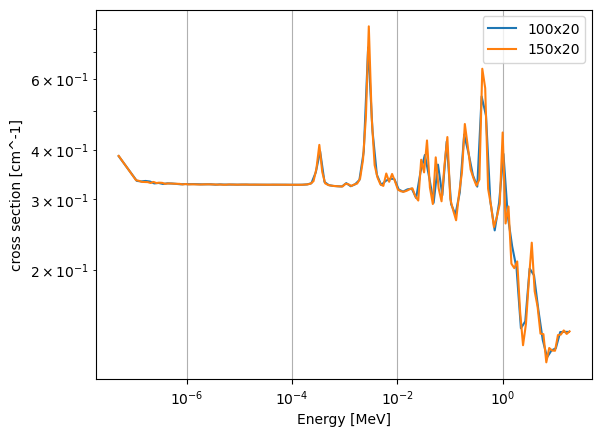

In [16]:
plt.figure()
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('cross section [cm^-1]')
plt.loglog()

for N, M in ((100, 20), (150, 20)):
    df = data['Norite', N, M]
    Eg = (df['Eg'].values[1:] + df['Eg'].values[:-1])/2
    xs = df['xs'].values[1:]
    xt = df['xt'].values[1:]
    plt.plot(Eg, xs, label = f'{N}x{M}')

plt.legend()

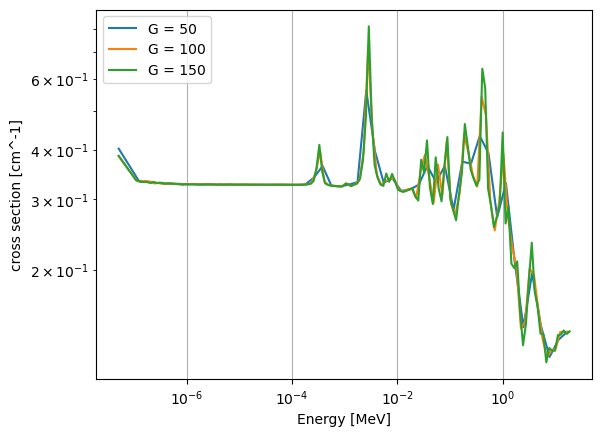

In [17]:
plt.figure()
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('cross section [cm^-1]')
plt.loglog()

for G in (50, 100, 150):
    df = data['Norite', G, 20]
    Eg = (df['Eg'].values[1:] + df['Eg'].values[:-1])/2
    xs = df['xs'].values[1:]
    xt = df['xt'].values[1:]
    plt.plot(Eg, xs, label = f'G = {G}')

plt.legend()

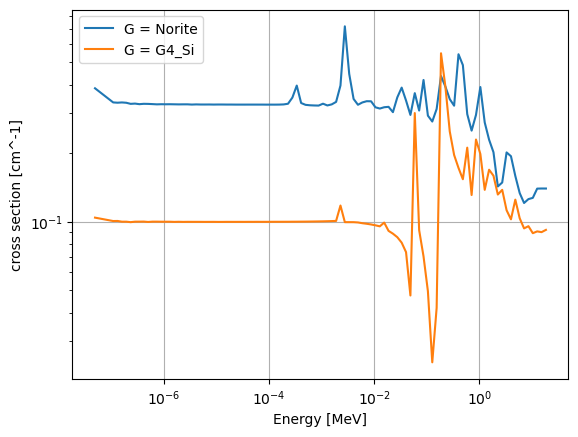

In [19]:
# comparing Si and Norite cross sections
plt.figure()
plt.grid()
plt.xlabel('Energy [MeV]')
plt.ylabel('cross section [cm^-1]')
plt.loglog()

for mat in ('Norite', 'G4_Si'):
    df = data[mat, 100, 20]
    Eg = (df['Eg'].values[1:] + df['Eg'].values[:-1])/2
    xs = df['xs'].values[1:]
    xt = df['xt'].values[1:]
    plt.plot(Eg, xs, label = f'G = {mat}')

plt.legend()